In [ ]:
for i in range(10):
    start_time = time.time()
    envs = [lambda: gym.make('CartPole-v0') for x in range(1)]
    venv = ParallelEnvironment(envs)
    agent = PPOAgent(venv, buffer_size=64)
    agent.run(50)
    print("{:.3f}".format(time.time() - start_time))

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [ ]:
import threading
from IPython.display import display
import ipywidgets as widgets
from sidecar import Sidecar

In [ ]:
run_dir = "./runs/agent-27/data/"
line_limit = 10
log_path = run_dir + 'agent.txt'
log_val = []
kill_thread = False
last_frame_count = 0
empty_frame_count = 0

def update_log():
    log_val = ['<li><code style="font-size: 10px;">{}</code></li>'.format(line) for 
               line in list(open(log_path))[-line_limit:]]
    log_widget.value = '<ul style="list-style-type: none; padding: 0;">' + ''.join(log_val) + '</ul>'
    
def on_change(x):
    if (x['name'] == 'value'):
        update_image(x['new'])
        
def kill_thread_click(x):
    global kill_thread
    kill_thread = True
        
def live_update():
    global last_frame_count
    global empty_frame_count
    while True:
        update_count_widget.value = "Last Update: " + time.strftime('%c')
        update_log()
        if last_frame_count == frame_count:
            empty_frame_count += 1
        else:
            last_frame_count = frame_count
            empty_frame_count = 0
        if empty_frame_count > 10 or kill_thread:
            update_count_widget.value = 'Halted: ' + time.strftime('%c')
            break
        time.sleep(1)

play_widget = widgets.Play(
    interval=250,
    value=frame_count,
    min=0,
    max=frame_count,
    step=1,
    description="Press play",
    disabled=False
)
slider_widget = widgets.IntSlider(max=frame_count)
image_widget = widgets.Image(format='png', height=100)
 
slider_widget.observe(on_change)
widgets.jslink((play_widget, 'value'), (slider_widget, 'value'))

log_widget = widgets.HTML()

update_count_widget = widgets.Label()

kill_button_widget = widgets.Button(
    description='Kill Thread'
)
kill_button_widget.on_click(kill_thread_click)

thread = threading.Thread(target=live_update)
thread.start()

training_info = widgets.VBox([image_widget,
                      widgets.HBox([kill_button_widget, play_widget, slider_widget, update_count_widget]),
                      log_widget])

sc = Sidecar(title='Training Info')
with sc:
    display(training_info)

## ZeroMQ

In [ ]:
import zmq

In [ ]:
context = zmq.Context()
with context.socket(zmq.REQ) as socket:
    socket.connect('tcp://127.0.0.1:5555')
    socket.send_string('zeromq')
    msg = socket.recv()
    print(msg)

# Logging

In [1]:
%load_ext autoreload
%autoreload 2
from MarkovDecisionProcess import MarkovDecisionProcess
import numpy as np
import time
import json

In [2]:
mdp = MarkovDecisionProcess(overwrite=True)

In [174]:
mdp.create_log_dir()

In [175]:
logger = mdp.setup_logger("test")

# Testing New Agent

In [1]:
%load_ext autoreload
%autoreload 2
from Agent import Agent
from ParallelEnvironment import ParallelEnvironment
import gym
import time
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tf.enable_eager_execution(config=config)

In [71]:
env = gym.make('CartPole-v0')
agent = Agent(env)
agent.train(500)

Ep: 99, Rew: 66.0
Ep: 199, Rew: 103.0
Ep: 299, Rew: 200.0
Ep: 399, Rew: 200.0
Ep: 499, Rew: 157.0


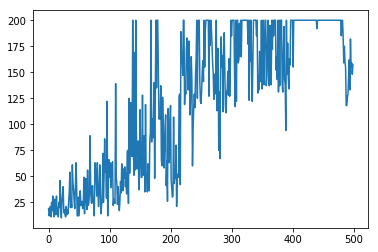

In [72]:
plt.plot(agent.episode_rews)